<a href="https://colab.research.google.com/github/NehaKumari500092077/Image-Processing/blob/main/normal_abnormal_bit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [97]:
!unzip /content/mit_bih_data_less.zip -d /content

Archive:  /content/mit_bih_data_less.zip
   creating: /content/mit_bih_data_less/
   creating: /content/mit_bih_data_less/validate/
  inflating: /content/mit_bih_data_less/.DS_Store  
  inflating: /content/__MACOSX/mit_bih_data_less/._.DS_Store  
   creating: /content/mit_bih_data_less/test/
   creating: /content/mit_bih_data_less/train/
   creating: /content/mit_bih_data_less/validate/Abnormal/
   creating: /content/mit_bih_data_less/validate/Normal/
  inflating: /content/mit_bih_data_less/test/.DS_Store  
  inflating: /content/__MACOSX/mit_bih_data_less/test/._.DS_Store  
   creating: /content/mit_bih_data_less/test/Abnormal/
   creating: /content/mit_bih_data_less/test/Normal/
  inflating: /content/mit_bih_data_less/train/.DS_Store  
  inflating: /content/__MACOSX/mit_bih_data_less/train/._.DS_Store  
   creating: /content/mit_bih_data_less/train/Abnormal/
   creating: /content/mit_bih_data_less/train/Normal/
  inflating: /content/mit_bih_data_less/validate/Abnormal/104_1370.png  
 

In [98]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

IMAGE_SIZE = [224, 224]

In [108]:
#Give dataset path
train_path = '/content/mit_bih_data_less/train'
test_path = '/content/mit_bih_data_less/test'

In [99]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [100]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_6')>

In [101]:
for layer in vgg.layers:
  layer.trainable = False

In [102]:
folders = glob('/content/mit_bih_data_less/train/*')
print(len(folders))

2


In [103]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='sigmoid')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [104]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [105]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [106]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [143]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 1000 images belonging to 2 classes.


In [144]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 100 images belonging to 2 classes.


In [145]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/Dataset/mit-bih-arrhythmia-database_train/Model502.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=2,
  validation_steps=2,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10

Epoch 1: val_loss improved from inf to 15.03525, saving model to /content/drive/MyDrive/Dataset/mit-bih-arrhythmia-database_train/Model502.h5
2/2 - 3s - loss: 1.1207 - accuracy: 0.9500 - val_loss: 15.0352 - val_accuracy: 0.2188 - 3s/epoch - 1s/step
Epoch 2/10

Epoch 2: val_loss improved from 15.03525 to 13.70928, saving model to /content/drive/MyDrive/Dataset/mit-bih-arrhythmia-database_train/Model502.h5
2/2 - 2s - loss: 1.7472 - accuracy: 0.9531 - val_loss: 13.7093 - val_accuracy: 0.1719 - 2s/epoch - 1s/step
Epoch 3/10

Epoch 3: val_loss did not improve from 13.70928
2/2 - 2s - loss: 0.5830 - accuracy: 0.9844 - val_loss: 17.2441 - val_accuracy: 0.2656 - 2s/epoch - 982ms/step
Epoch 4/10

Epoch 4: val_loss did not improve from 13.70928
2/2 - 2s - loss: 1.1398 - accuracy: 0.9062 - val_loss: 18.3161 - val_accuracy: 0.3438 - 2s/epoch - 1000ms/step
Epoch 5/10

Epoch 5: val_loss did not improve from 13.70928
2/2 - 2s - loss: 1.1696 - accuracy: 0.9375 - val_loss: 22.8339 - val_acc

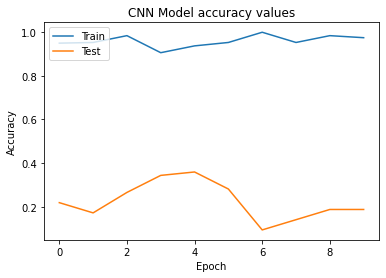

In [146]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [147]:
from keras import models  
model = models.load_model('/content/drive/MyDrive/Dataset/mit-bih-arrhythmia-database_train/Model502.h5')


In [148]:
train_set.class_indices

{'Abnormal': 0, 'Normal': 1}

1/1 [==============================] - 0s 25ms/step


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 0s 26ms/step
Confusion matrix, without normalization
[[44  6]
 [ 0 50]]


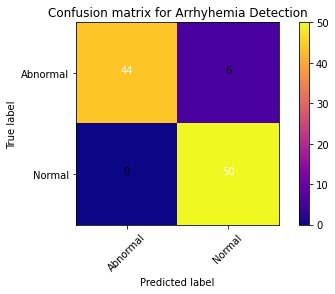

In [150]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools
import numpy as np
import matplotlib.pyplot as plt
import keras.utils as image

y_actual = []
y_test = []

for i in os.listdir("/content/mit_bih_data_less/test/Abnormal"):
  img = image.load_img("/content/mit_bih_data_less/test/Abnormal/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = (model.predict(img) > 0.5).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(0)

for i in os.listdir("/content/mit_bih_data_less/test/Normal"):
  img = image.load_img("/content/mit_bih_data_less/test/Normal/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = (model.predict(img) > 0.5).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(1)

y_actual = np.array(y_actual)
y_test = np.array(y_test)

cm = confusion_matrix(y_actual,y_test)

class_names = ["Abnormal","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Arrhyhemia Detection',cmap="plasma")


1/1 [==============================] - 0s 30ms/step


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


This Scalogram Image is of Abnormal
Prediction Of Our Model :  Abnormal


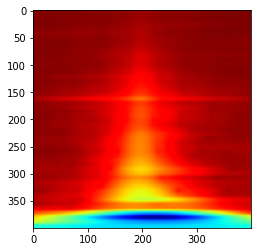

In [151]:
import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
#from keras.preprocessing import image
import keras.utils as image


test_image = '/content/mit_bih_data_less/validate/Abnormal/104_1357.png'
xtest_image = image.load_img(test_image, target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
#results = model.predict(xtest_image)
results = (model.predict(xtest_image) > 0.5).astype("int32")
# training_set.class_indices
imggg = cv2.imread(test_image)
print("This Scalogram Image is of Abnormal")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Abnormal'
else:
    prediction = 'Normal'
print("Prediction Of Our Model : ",prediction)


In [130]:
#bulbul
results

array([[1, 1]], dtype=int32)

1/1 [==============================] - 0s 28ms/step
This Scalogram Image is of normal
Prediction Of Our Model :  Abnormal


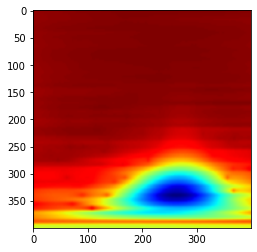

In [152]:
import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
#from keras.preprocessing import image
import keras.utils as image


test_image = '/content/mit_bih_data_less/validate/Normal/230_36.png'
xtest_image = image.load_img(test_image, target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
#results = model.predict(xtest_image)
results = (model.predict(xtest_image) > 0.5).astype("int32")
# training_set.class_indices
imggg = cv2.imread(test_image)
print("This Scalogram Image is of normal")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Abnormal'
else:
    prediction = 'Normal'
print("Prediction Of Our Model : ",prediction)

In [40]:
#cuckoo
results

array([[1, 0]], dtype=int32)